In [40]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim

In [41]:
#Punto 1

100%|██████████| 3001/3001 [00:00<00:00, 41373.11it/s]


<IPython.core.display.Javascript object>


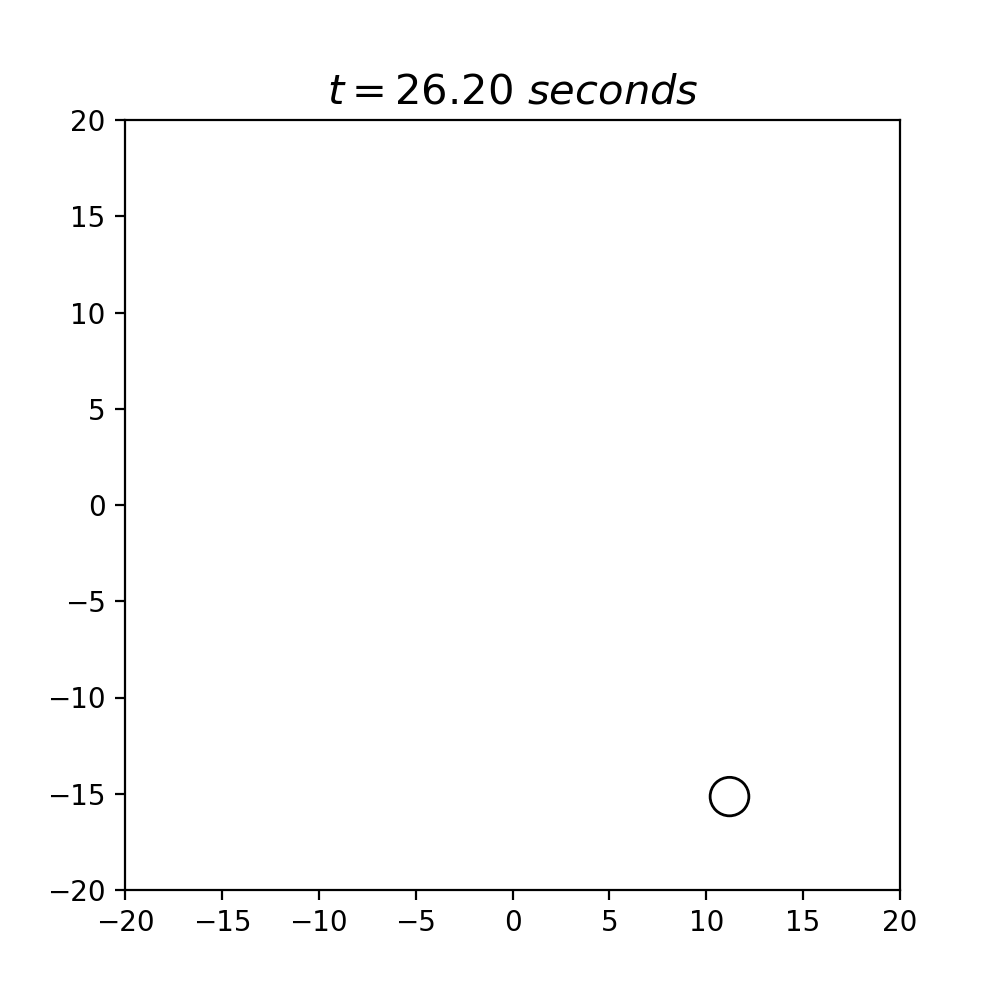

In [47]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]*0.9
            if self.r[i] - self.radius < - limits[i]:
                if self.v[i]<0:
                    self.v[i] = - self.v[i]*0.9
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
               # print(self.RrVector)


dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)
NParticles = 1


Limits = np.array([20.,20.])



def RunSimulation(t,NParticles = 1, Velo = 5):
    x0=np.array([-15.,5.])
    v0=np.array([1.,0.])
    a0=np.array([0.,-9.8])
    Particles=[]
    p=Particle(x0,v0,a0,t,1.,1.,1)
    Particles.append(p)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
        
        
    return Particles


Particles = RunSimulation(t,1,Velo=5)


def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)


redt = ReduceTime(t,10)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        
        vx = p.GetVelocityVector()[i,0]
        vy = p.GetVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
        plot = ax.add_patch(circle)
        #plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)





In [48]:
Energía_cin_x=[]
Energía_cin_y=[]
Energía_cin=[]
Energía_pot=[]
Energía_mec=[]
for i in range(len(Particles[0].vVector)):
    Exi=(1/2)*1*((Particles[0].vVector[i][0])**2)
    Eyi=(1/2)*1*((Particles[0].vVector[i][1])**2)
    v2=(Particles[0].vVector[i][0])**2+(Particles[0].vVector[i][1])**2
    Ei=(1/2)*v2
    Energía_cin_x.append(Exi)
    Energía_cin_y.append(Eyi)
    Energía_cin.append(Ei)
    Epi=(Particles[0].rVector[i][1]+20)*9.8
    Energía_pot.append(Epi)
    Emi=Epi+Ei
    Energía_mec.append(Emi)





<IPython.core.display.Javascript object>


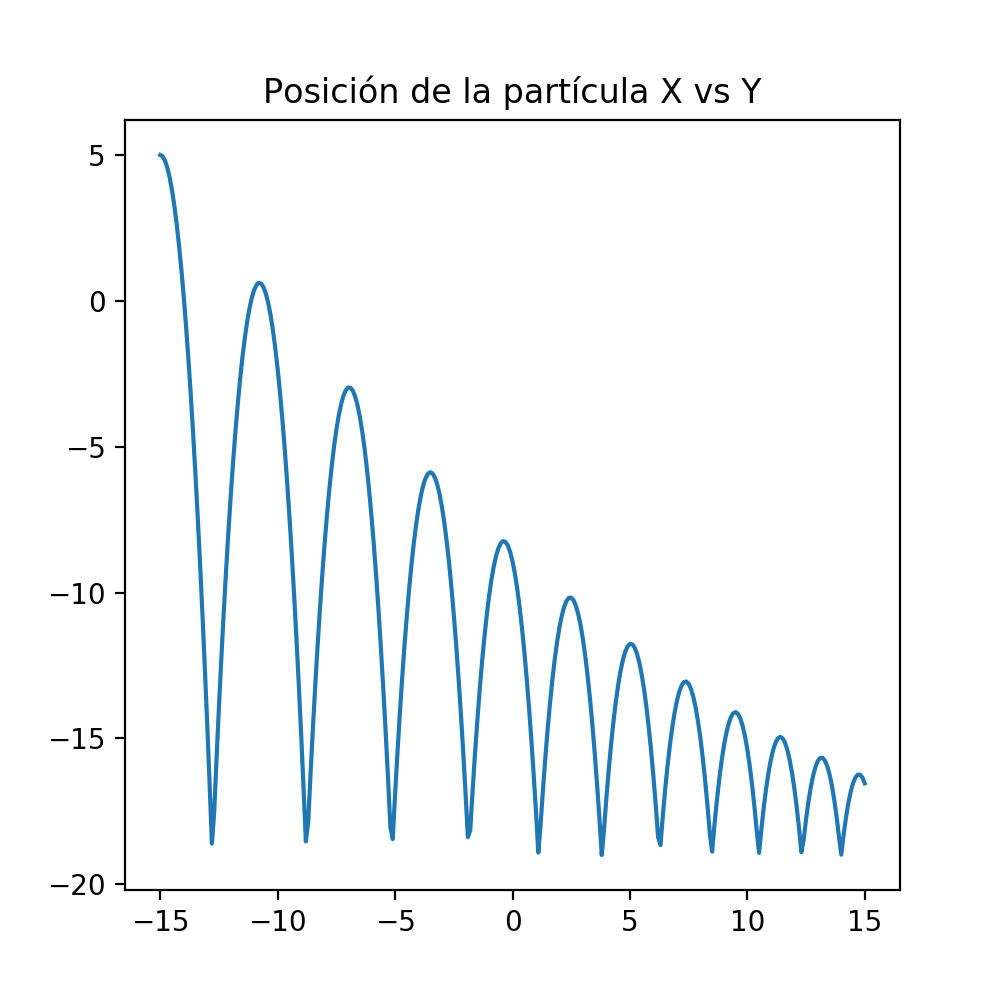

<IPython.core.display.Javascript object>


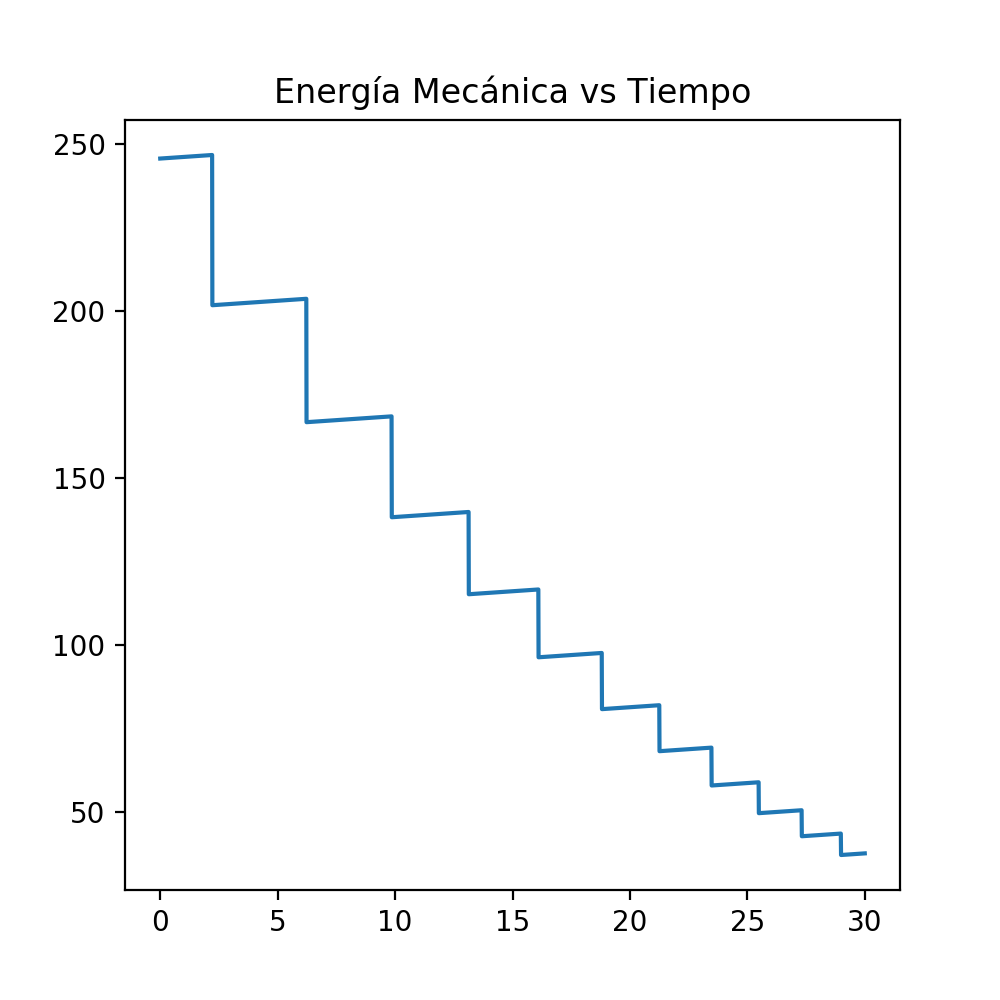

El tiempo estimado para el cual la pelota deja de rebotar son 35 segundos


In [49]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
x=[]
y=[]
for i in range(len(Particles[0].GetRPositionVector())):
    x.append(Particles[0].GetRPositionVector()[i][0])
    y.append(Particles[0].GetRPositionVector()[i][1])
plt.plot(x,y)
plt.title("Posición de la partícula X vs Y")


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
plt.plot(t,Energía_mec)
plt.title("Energía Mecánica vs Tiempo")


print("El tiempo estimado para el cual la pelota deja de rebotar son 35 segundos")

In [ ]:
#Punto 2

In [50]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,dim=3):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
               # print(self.RrVector)

In [51]:
# Discretization
dt = 0.01
tmax = 10
t = np.arange(0,tmax+dt,dt)
print(len(t))

1001


In [52]:
def GetParticles(NParticles,Limit,Velo,Dim=3,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

In [53]:
Limits = np.array([10.,10.,10.])

In [54]:
def RunSimulation(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticles(NParticles,Limits[0],Velo = Velo,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
        
        
    return Particles

In [55]:
Particles = RunSimulation(t,30,Velo=50)

100%|██████████| 1001/1001 [00:00<00:00, 2277.45it/s]


In [56]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [57]:
redt = ReduceTime(t,10)


<IPython.core.display.Javascript object>


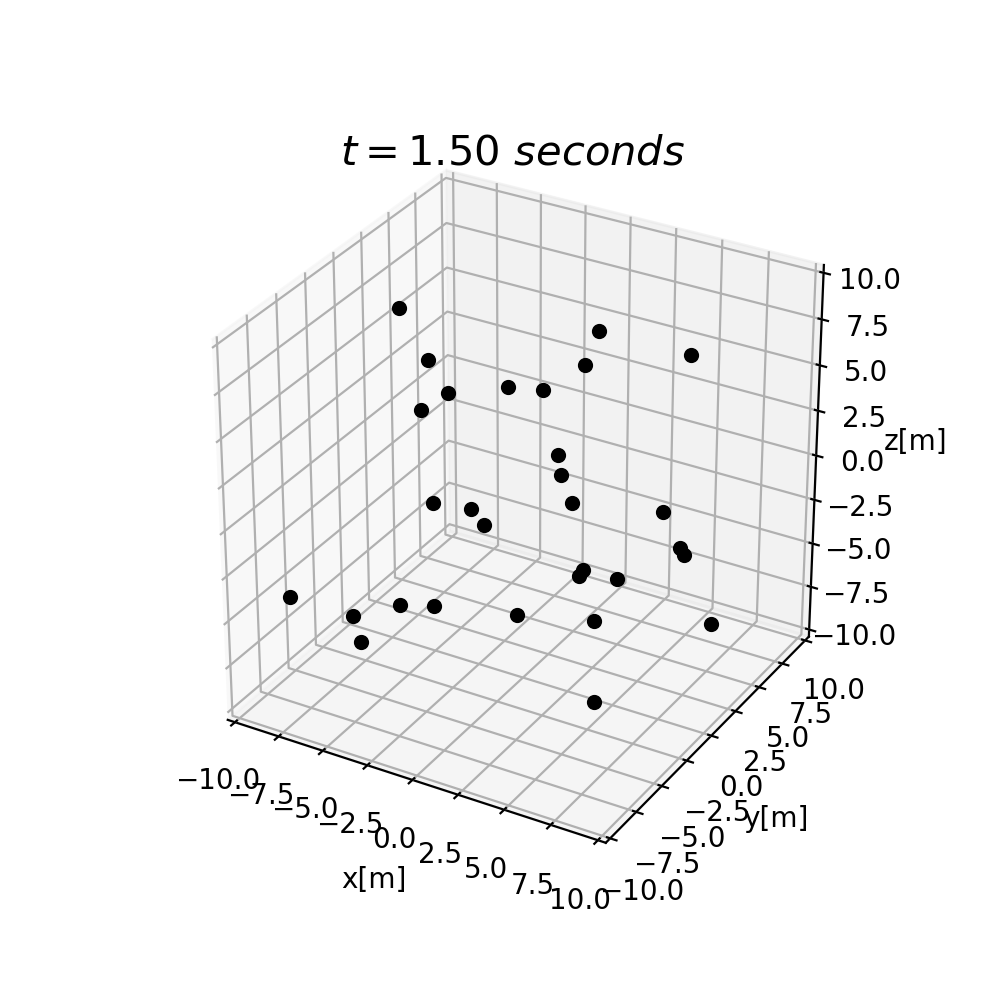

In [58]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1, projection='3d')


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_zlim(-Limits[2],Limits[2])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]
        
        vx = p.GetVelocityVector()[i,0]
        vy = p.GetVelocityVector()[i,1]
        vz = p.GetVelocityVector()[i,1]
        
        ax.set_xlabel('x[m]')
        ax.set_ylabel('y[m]')
        ax.set_zlabel('z[m]')


        
        plot = ax.scatter(x, y, z, color='black');
        #plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
    


        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)